In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Example of loading data into a pandas DataFrame (replace with your actual data loading)
df = pd.read_csv('data/tmp/encoded_train.csv')
test_df = pd.read_csv('data/tmp/encoded_test.csv')

# Display the first few rows of the dataframe
df.head()


,Day,Month,Hour,Night,Holiday,Block,lat,long,Category,DayOfWeek-Monday,...,StreetType-LN,StreetType-DR,StreetType-CT,StreetType-WAY,StreetType-RW,StreetType-PZ,Season-Winter,Season-Fall,Season-Spring,Season-Summer
0,29,11,0,1,0,0,0.584478,-1.557336,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6,8,0,0,1,0.911468,0.775401,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,0,1
2,27,4,6,0,0,1,-2.045603,0.570183,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,1,0
3,1,4,15,0,0,32,1.510611,-0.150875,ASSAULT,0,...,0,0,0,0,0,0,0,0,1,0
4,25,7,16,0,0,0,0.718501,0.532851,ASSAULT,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # Features: all columns except 'Category'
y = df['Category'] 

x_test = test_df.drop('Category', axis=1) # Features: all columns except 'Category'
y_test = test_df['Category']


In [4]:
model = RandomForestClassifier(
    n_estimators=50,        # Anzahl der Bäume
    max_depth=40,           # Maximale Tiefe der Bäume
    random_state=42,        # Zufalls-Seed für Reproduzierbarkeit
    min_samples_leaf=4,     # Minimale Samples pro Blatt
    min_samples_split=2,    # Minimale Samples zum Splitten
    verbose=2,              # Detaillierte Fortschrittsmeldungen
    n_jobs=8                # Anzahl der verwendeten Prozessoren
)

In [5]:
# Fitting the model
model.fit(X, y)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    7.1s


building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   12.7s finished


RandomForestClassifier(max_depth=40, min_samples_leaf=4, n_estimators=50,
                       n_jobs=8, random_state=42, verbose=2)

In [6]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                  Feature  Importance
6                     lat    0.183089
7                    long    0.174843
0                     Day    0.134432
2                    Hour    0.121995
5                   Block    0.078485
1                   Month    0.077085
9        DayOfWeek-Friday    0.014438
11     DayOfWeek-Thursday    0.013959
12      DayOfWeek-Tuesday    0.013856
13    DayOfWeek-Wednesday    0.013706
46            Season-Fall    0.013384
8        DayOfWeek-Monday    0.013350
47          Season-Spring    0.013339
48          Season-Summer    0.013279
3                   Night    0.013157
45          Season-Winter    0.012583
14     DayOfWeek-Saturday    0.012482
21  PdDistrict-TENDERLOIN    0.011872
10       DayOfWeek-Sunday    0.011856
34         StreetType-INT    0.011208
29          StreetType-ST    0.005470
16    PdDistrict-SOUTHERN    0.004901
4                 Holiday    0.004165
19     PdDistrict-BAYVIEW    0.004163
32          StreetType-AV    0.003961
17    PdDist

## Evaluation

### Accuracy on **train dataset**

In [7]:
y_train_pred = model.predict(X)

accuracy = accuracy_score(y, y_train_pred)
print(f"Accuracy for train dataset: {accuracy}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    7.2s finished


Accuracy for train dataset: 0.5838711840897967


### Accuracy

In [8]:
# Predict on the test data
y_pred = model.predict(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.6s finished


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.30111610956095897


### Precision and Recall per class

In [10]:
precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)
f1_scores = f1_score(y_test, y_pred, average=None)

# Round scores
precision_scores = [round(score, 2) for score in precision_scores]
recall_scores = [round(score, 2) for score in recall_scores]
f1_scores = [round(score, 2) for score in f1_scores]

classes = model.classes_

precision_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores
})

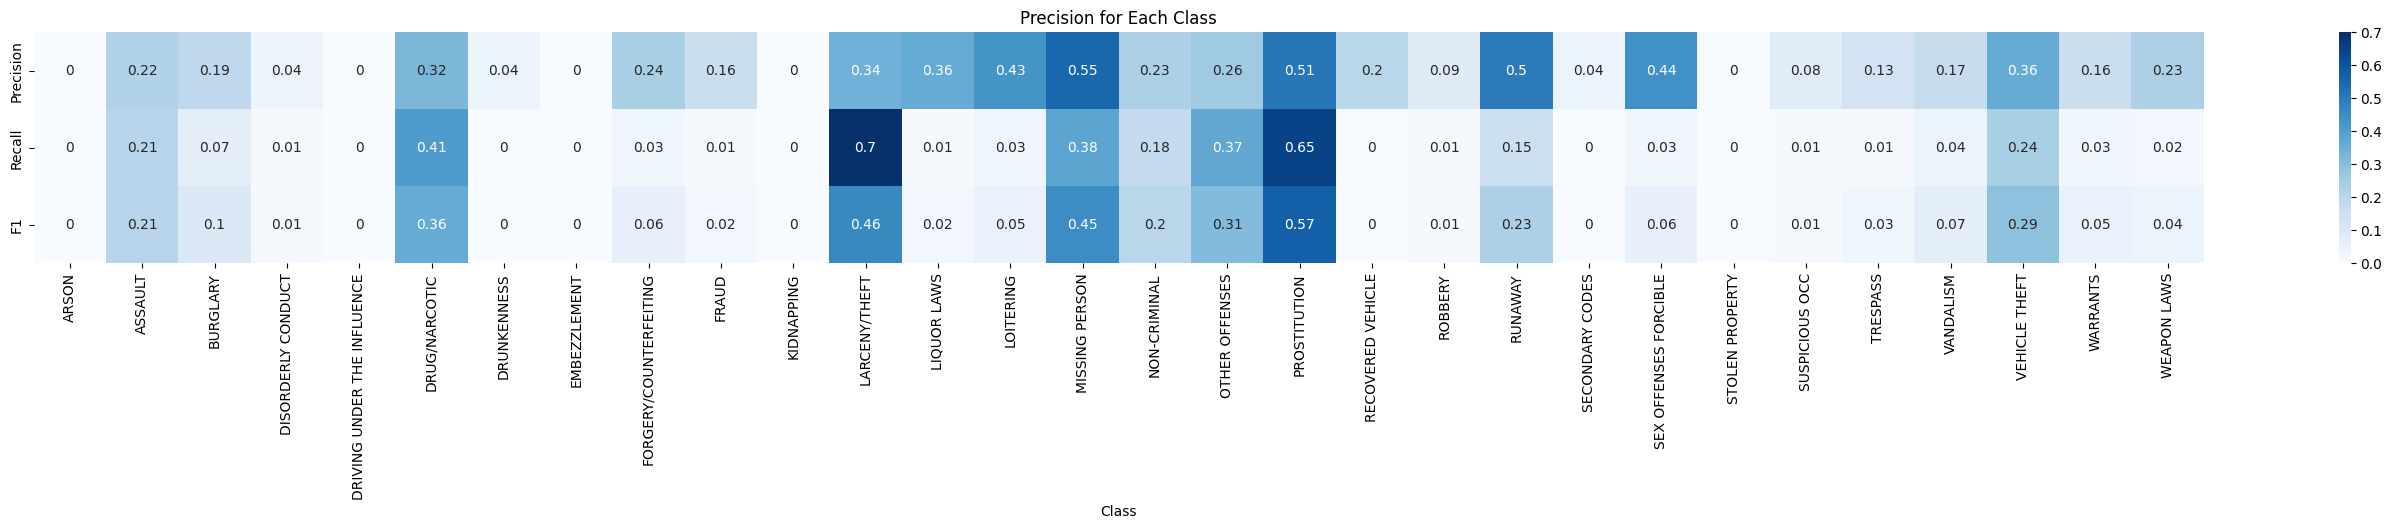

In [11]:
# Plot the DataFrame as a heatmap
plt.figure(figsize=(35, 3))
sns.heatmap(precision_df.set_index('Class').T, annot=True, cmap="Blues")
plt.title('Precision for Each Class')
plt.savefig('models/random_forest/scores_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Balenced Accuracy

In [12]:
recall_sum = sum(recall_scores)
amount_of_classes = len(recall_scores)
balenced_accuracy = recall_sum / amount_of_classes
print(f"Balenced Accuracy Score: {balenced_accuracy}")

Balenced Accuracy Score: 0.11999999999999995


In [13]:
accuracy = balanced_accuracy_score(y_test, y_pred)
print(accuracy)

0.12042957236289413


### Precision / Recall Average

In [14]:
precision_avg = precision_score(y_test, y_pred, average='weighted')
recall_avg = recall_score(y_test, y_pred, average='weighted')
f1_avg = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted average for precision: {round(precision_avg, 2)}")
print(f"Weighted average for recall: {round(recall_avg, 2)}")
print(f"Weighted average for f1: {round(f1_avg, 2)}")

Weighted average for precision: 0.26
Weighted average for recall: 0.3
Weighted average for f1: 0.25


### Log Loss

In [15]:
y_pred_proba = model.predict_proba(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.8s finished


In [16]:
label_binarizer = LabelBinarizer()
labelTransformed = label_binarizer.fit_transform(y_test)

df = pd.DataFrame(y_pred_proba, columns=model.classes_)
df = df[label_binarizer.classes_]

loss = log_loss(labelTransformed, df)
print(f'Log Loss: {loss}')

Log Loss: 2.461236027740552


### Normalized Confusion Matrix

In [17]:
cnf_matrix = confusion_matrix(y_test, y_pred)


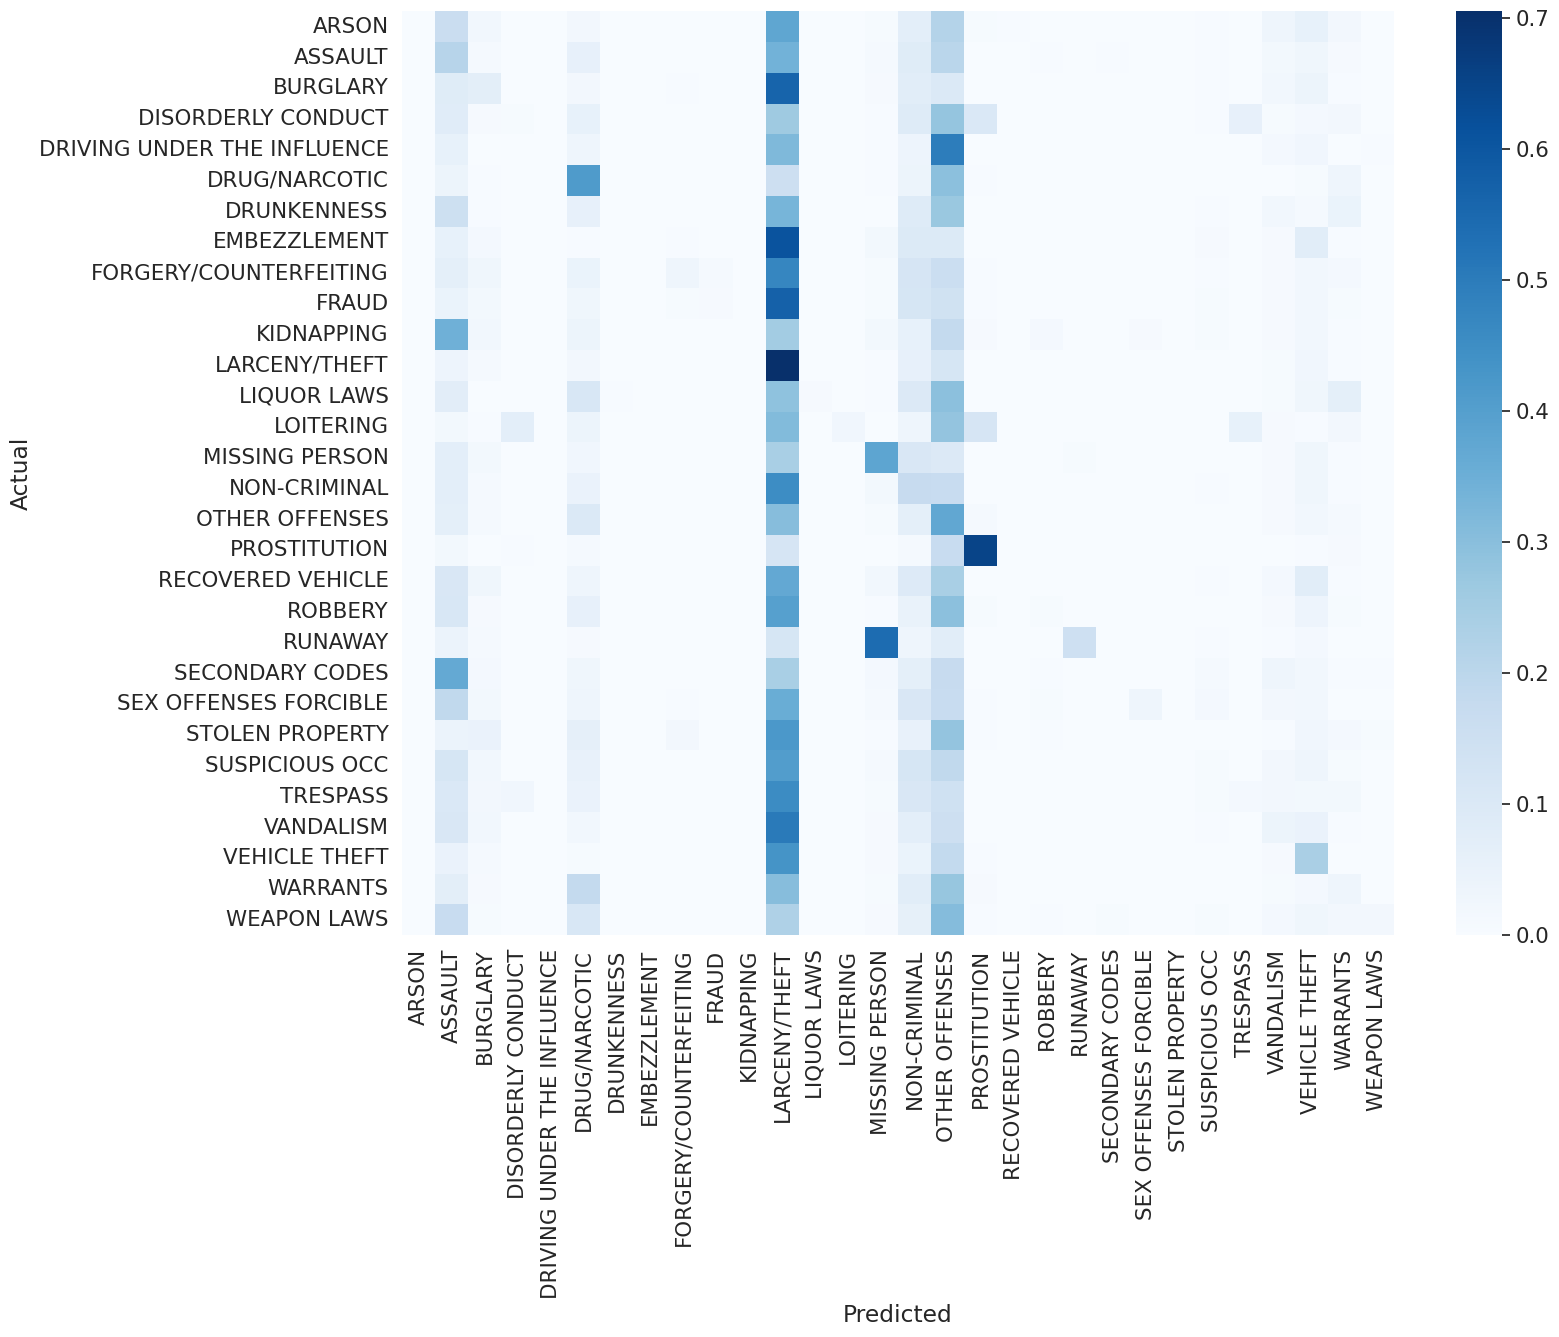

In [18]:
cnf_normalized = cnf_matrix / np.sum(cnf_matrix, axis=1).reshape(-1,1)


df_cm = pd.DataFrame(cnf_normalized, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4)  # for label size

# Plot the normalized confusion matrix
sns.heatmap(df_cm, cbar=True, cmap= "Blues", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )
plt.savefig('models/random_forest/confusion_matrix.png', dpi=300, bbox_inches='tight')

In [19]:
# Save the model
joblib.dump(model, 'models/random_forest/random_forest_model.pkl')

['models/random_forest/random_forest_model.pkl']